# Multiple Linear Regression on Insurance Costs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings; warnings.simplefilter("ignore")

In [2]:
ins = pd.read_csv("insurance (1).csv")
print(ins.head())
print(f"Length of dataset: {len(ins)}")
print(f"Median Insurance Cost: $ {np.median(ins.charges)}")

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Length of dataset: 1338
Median Insurance Cost: $ 9382.033


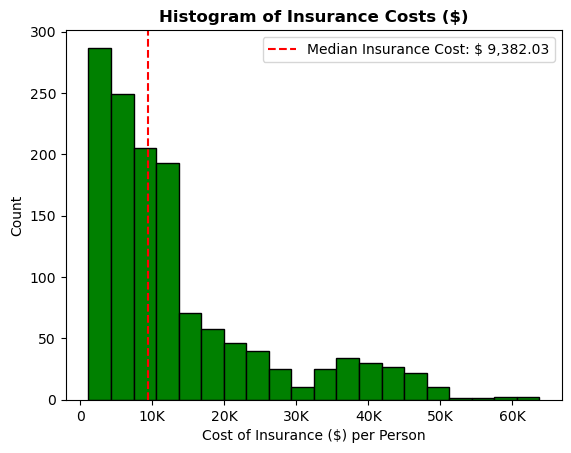

In [3]:
fig, ax = plt.subplots()

ax.hist(ins.charges, color = "green", edgecolor = "black", bins = 20)
ax.set_xlabel("Cost of Insurance ($) per Person")
ax.set_xticklabels([" ", "0", "10K", "20K", "30K", "40K", "50K", "60K"])
ax.axvline(np.median(ins.charges), color = "r", linestyle = "--")
ax.legend(["Median Insurance Cost: $ 9,382.03"])
ax.set_ylabel("Count")
ax.set_title("Histogram of Insurance Costs ($)", fontweight = "bold")
plt.show()

First I need to encode the categorical variables into numerical form for regression

In [11]:
label = LabelEncoder()

ins["sex_encoded"] = label.fit_transform(ins.sex)
ins["smoker_encoded"] = label.fit_transform(ins.smoker)
ins["region_encoded"] = label.fit_transform(ins.region)

print(ins.head(10))

   age     sex     bmi  children smoker     region      charges  sex_encoded  \
0   19  female  27.900         0    yes  southwest  16884.92400            0   
1   18    male  33.770         1     no  southeast   1725.55230            1   
2   28    male  33.000         3     no  southeast   4449.46200            1   
3   33    male  22.705         0     no  northwest  21984.47061            1   
4   32    male  28.880         0     no  northwest   3866.85520            1   
5   31  female  25.740         0     no  southeast   3756.62160            0   
6   46  female  33.440         1     no  southeast   8240.58960            0   
7   37  female  27.740         3     no  northwest   7281.50560            0   
8   37    male  29.830         2     no  northeast   6406.41070            1   
9   60  female  25.840         0     no  northwest  28923.13692            0   

   smoker_encoded  region_encoded  
0               1               3  
1               0               2  
2          

Next I train the model:

- charges feature as the variable being tested
- all other features serving as predictors

In [5]:
x = ins[["age", "sex_encoded", "bmi", "children", "smoker_encoded", "region_encoded"]]
y = ins.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

lm = LinearRegression()

lm.fit(x_train, y_train)

lm.score(x_test, y_test)

0.7942462599118463

R Squared of 0.794 proves a strong linear relationship between the test set. Next we can use Recursive Feature Elimination to attempt to improve accuracy further

In [6]:
rfe = RFE(lm, n_features_to_select = 5)

rfe.fit(x, y)
for i, col in enumerate(x.columns):
    print(f"Column {i}: {col}")
print(rfe.ranking_)
print(rfe.support_)

Column 0: age
Column 1: sex_encoded
Column 2: bmi
Column 3: children
Column 4: smoker_encoded
Column 5: region_encoded
[1 2 1 1 1 1]
[ True False  True  True  True  True]


In [7]:
x1 = ins[["bmi", "children", "smoker_encoded", "region_encoded", "age"]]

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 100)

lm = LinearRegression()

lm.fit(x_train, y_train)

lm.score(x_test, y_test)

0.7942746346066889

0.794 is our maximum accuracy with 5 features selected

In [8]:
coef = lm.coef_
intercept = lm.intercept_

Now we can make Predictions!

In [ ]:
while True:
    bmi = int(input("Welcome to Insurance Cost Calculator! Enter BMI or enter 100 to quit application"))
    if bmi == 100:
        break
    children = int(input("Enter number of Children: "))
    smoker = input("Are you a Smoker? ('yes'/'no'): ")
    if smoker == "yes":
        smoker = 1
    elif smoker == "no":
        smoker = 0
    else:
        print("An Error occured")
        continue
    region = input("What Region are you located? (southwest/southeast/northwest/northeast): ")
    if region == "northeast":
        region = 0
    elif region == "northwest":
        region = 1
    elif region == "southeast":
        region = 2
    elif region == "southwest":
        region = 3
    else:
        print("An Error occured")
        continue
    age = int(input("Enter Age: "))
    
    prediction = lm.predict([[bmi, children, smoker, region, age]])
    
    if prediction:
        format_pred = '{:,.2f}'.format(prediction[0])
        print(f"Your predicted Cost of Insurance is $ {format_pred}.")
    else:
        print("An Error occured")
    

Welcome to Insurance Cost Calculator! Enter BMI or enter 100 to quit application 23
Enter number of Children:  2
Are you a Smoker? ('yes'/'no'):  yes
What Region are you located? (southwest/southeast/northwest/northeast):  southwest
Enter Age:  24


Your predicted Cost of Insurance is $ 25,409.47.
